<a href="https://colab.research.google.com/github/udaypratapyati/Insaid_MachineLearning/blob/master/Kmeans_clustering_Assignment_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# ASSIGNMENT
## Customer Segmentation Dataset

__Context__<br/>
- In today's competitive world, it is crucial to understand customer bahaviour and categorise customers based on their demography and buying behaviour. This is broadly one aspect of customer segmentation that allows marketers to better tailor their marketing efforts to various audience subsets in terms of promotional, marketing and product development strategies.

__Objective__<br/>
- This assignment demonstrates the concept of segmentation of a customer dataset from an e-commerce site using k-means clustering in python. You will use the kmeans and the hierarchical clustering algorithms to derive the optimum number of clusters and understand the underlying customer segments based on the data provided.

__About the dataset__<br/>
- The dataset consists of Annual income (in `$`000) and their annual spend (in `$`000) on an e-commerce site for a period of one year. Let us explore the data using numpy and pandas libraries in python.

### Import the dataset

In [95]:
import pandas as pd
dataset= pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/CLV.csv')
dataset.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


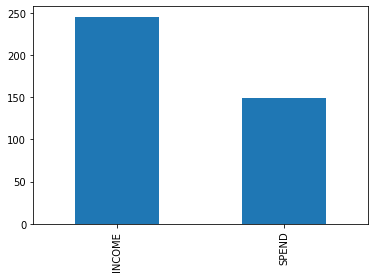

In [96]:
import matplotlib.pyplot as plt
% matplotlib inline
dataset.mean().plot(kind='bar')


### Check the shape of the dataset

In [97]:
dataset.shape

(303, 2)

### Check the columns present in the dataset

In [98]:
dataset.columns

Index(['INCOME', 'SPEND'], dtype='object')

### Check the descriptive statistics of the dataset

In [99]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


The mean annual income is `$`245000 and the mean annual spend is `$`149000. 

### Check the info of the dataset

In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  303 non-null    int64
 1   SPEND   303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


### Q 1. Write a code to check the missing values present in the dataset. 

In [101]:
def generate():
    return dataset.isnull().sum()# Your variable to return
generate()

INCOME    0
SPEND     0
dtype: int64

### Q 2. Illustrate the distribution of the annual income and annual spend with a distplot.

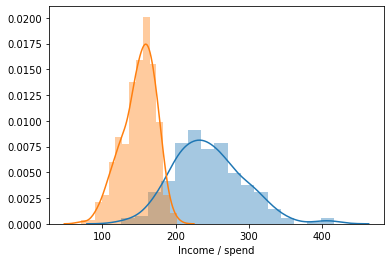

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
def generate():
    # Your code here
    income = sns.distplot(dataset.INCOME)
    spend = sns.distplot(dataset.SPEND)
    plt.xlabel('Income / spend')
generate()

### Q 3. Illustrate the distribution of the annual income and annual spend with Violinplot.

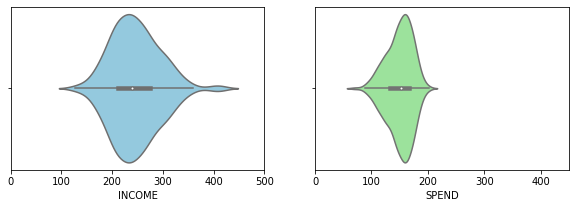

In [103]:
def generate():
    # Your code here
    fig, ax = plt.subplots(figsize=(10,3), ncols=2, nrows=1,sharey=True)
    v1 = sns.violinplot(data=dataset, x='INCOME', color="skyblue", ax=ax[0])
    v2 = sns.violinplot(data=dataset, x='SPEND',color="lightgreen", ax=ax[1])
    v1.set(xlim=(0,500))
    v2.set(xlim=(0,450))
generate()

### Q 4. Draw scatter plot of Spend versus Income to understand the spread, use color as black and size of marker as 100.

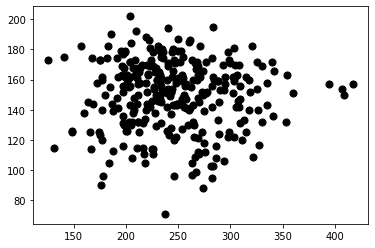

In [104]:
def generate():
    # Your code here
    plt.scatter(dataset['INCOME'], dataset['SPEND'], c='black', s=50)
    return
generate()

__Plotting in 3D space__

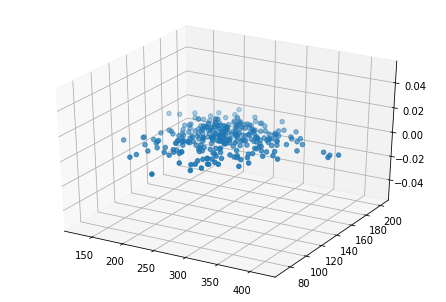

In [105]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = Axes3D(fig)

X = np.array(list(zip(dataset['INCOME'], dataset['SPEND'])))
ax.scatter(X[:, 0], X[:, 1])

### Q 5 . Make a kmeans model to cluster the samples in 4 clusters taking the below parameters:
- init='k-means++',
- max_iter=300, 
- n_init=10,
- random_state=0

### Return the model.


### Also Compute cluster centers and predict cluster index for each sample using fit_predict method(Return this variable also)

In [106]:
from sklearn.cluster import KMeans
def generate():
    # Your code here
    model = KMeans(max_iter=300, init='k-means++', n_init=10, random_state=0)
    return model, model.fit_predict(X) # your variables here
km4, y_means = generate()

y_means


array([0, 0, 2, 0, 1, 2, 4, 4, 2, 2, 0, 3, 4, 6, 4, 0, 1, 6, 0, 0, 0, 0,
       0, 0, 2, 4, 2, 7, 5, 2, 2, 7, 2, 4, 6, 2, 4, 0, 4, 1, 1, 0, 6, 0,
       1, 1, 0, 0, 6, 0, 0, 4, 0, 7, 0, 2, 2, 4, 2, 4, 3, 1, 2, 6, 2, 2,
       6, 0, 2, 2, 0, 0, 2, 4, 2, 0, 0, 0, 2, 0, 0, 4, 1, 4, 3, 4, 4, 2,
       2, 3, 0, 2, 0, 4, 7, 6, 5, 0, 1, 0, 0, 4, 2, 0, 2, 6, 6, 0, 0, 0,
       1, 7, 1, 2, 0, 2, 2, 2, 2, 0, 3, 4, 4, 4, 2, 2, 6, 4, 2, 3, 2, 4,
       4, 0, 4, 4, 7, 6, 6, 3, 4, 4, 2, 6, 6, 0, 0, 0, 0, 2, 6, 7, 0, 4,
       6, 6, 0, 2, 6, 0, 0, 1, 2, 2, 2, 3, 6, 4, 0, 2, 0, 0, 4, 0, 6, 7,
       0, 1, 7, 3, 1, 6, 1, 0, 6, 4, 0, 3, 0, 2, 1, 6, 7, 4, 2, 1, 0, 0,
       3, 0, 2, 0, 3, 4, 7, 0, 0, 0, 7, 2, 0, 0, 6, 1, 0, 1, 3, 1, 3, 0,
       5, 6, 4, 3, 6, 7, 3, 6, 4, 1, 0, 3, 4, 3, 1, 4, 4, 4, 4, 4, 3, 0,
       6, 3, 7, 4, 5, 3, 4, 0, 3, 0, 3, 3, 3, 1, 3, 6, 0, 0, 0, 0, 3, 4,
       6, 6, 1, 7, 3, 3, 0, 0, 3, 0, 3, 2, 6, 0, 1, 7, 1, 2, 6, 2, 6, 1,
       2, 0, 1, 6, 2, 1, 6, 6, 7, 2, 6, 7, 6, 3, 6,

In [107]:
km4.fit(X).score(X)
km4.labels_

array([0, 0, 2, 0, 1, 2, 4, 4, 2, 2, 0, 3, 4, 6, 4, 0, 1, 6, 0, 0, 0, 0,
       0, 0, 2, 4, 2, 7, 5, 2, 2, 7, 2, 4, 6, 2, 4, 0, 4, 1, 1, 0, 6, 0,
       1, 1, 0, 0, 6, 0, 0, 4, 0, 7, 0, 2, 2, 4, 2, 4, 3, 1, 2, 6, 2, 2,
       6, 0, 2, 2, 0, 0, 2, 4, 2, 0, 0, 0, 2, 0, 0, 4, 1, 4, 3, 4, 4, 2,
       2, 3, 0, 2, 0, 4, 7, 6, 5, 0, 1, 0, 0, 4, 2, 0, 2, 6, 6, 0, 0, 0,
       1, 7, 1, 2, 0, 2, 2, 2, 2, 0, 3, 4, 4, 4, 2, 2, 6, 4, 2, 3, 2, 4,
       4, 0, 4, 4, 7, 6, 6, 3, 4, 4, 2, 6, 6, 0, 0, 0, 0, 2, 6, 7, 0, 4,
       6, 6, 0, 2, 6, 0, 0, 1, 2, 2, 2, 3, 6, 4, 0, 2, 0, 0, 4, 0, 6, 7,
       0, 1, 7, 3, 1, 6, 1, 0, 6, 4, 0, 3, 0, 2, 1, 6, 7, 4, 2, 1, 0, 0,
       3, 0, 2, 0, 3, 4, 7, 0, 0, 0, 7, 2, 0, 0, 6, 1, 0, 1, 3, 1, 3, 0,
       5, 6, 4, 3, 6, 7, 3, 6, 4, 1, 0, 3, 4, 3, 1, 4, 4, 4, 4, 4, 3, 0,
       6, 3, 7, 4, 5, 3, 4, 0, 3, 0, 3, 3, 3, 1, 3, 6, 0, 0, 0, 0, 3, 4,
       6, 6, 1, 7, 3, 3, 0, 0, 3, 0, 3, 2, 6, 0, 1, 7, 1, 2, 6, 2, 6, 1,
       2, 0, 1, 6, 2, 1, 6, 6, 7, 2, 6, 7, 6, 3, 6,

### Q 6. Visulaize the clusters using scatter plot (Spend Vs Income). Taking marker size as 50, color for clusters 1 to 4 as purple, blue, green & cyan, label for various clusters as 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'. For the cluster centres use marker = 's', marker size as 200 and color as red, alpha blending value as 0.7 and label as 'Centroids'. Title of the plot should be ' Customer segments '.Set "Annual income of customer" as label of x axis and "Annual spend from customer on site" as label of y axis. 

In [108]:
y_means==0

array([ True,  True, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False,  True,  True, False,  True,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
        True,  True, False, False,  True, False, False, False,  True,
        True,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

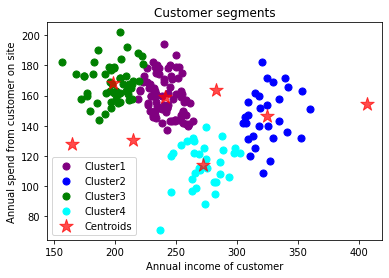

In [176]:
def generate():
    # your code here
    plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
    plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
    plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
    plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
    # plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='yellow',label='Cluster5')
    
    plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='*', c='red', alpha=0.7, label='Centroids')
    
    plt.title('Customer segments')
    plt.xlabel('Annual income of customer')
    plt.ylabel('Annual spend from customer on site')
    
    plt.legend()
    plt.show()
    return 
generate()

In [159]:
df = pd.DataFrame(X, columns=['INCOME', 'SPEND'])
df['pred'] = y_means
df.head()

,INCOME,SPEND,pred
0,233,150,0
1,250,187,0
2,204,172,2
3,236,178,0
4,354,163,1


In [174]:
# print( df.pred.unique())
# np.unique(y_means)

df = df[df.pred.apply(lambda x: True if x <4 else False)]
df.head()

,INCOME,SPEND,pred
0,233,150,0
1,250,187,0
2,204,172,2
3,236,178,0
4,354,163,1


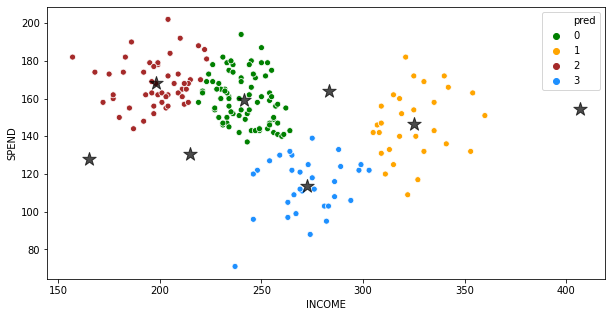

In [204]:

plt.subplots(figsize=(10,5))
_ = sns.scatterplot(df['INCOME'], df['SPEND'], hue=df.pred, palette=['green','orange','brown','dodgerblue']) # palette='Paired_r'
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='*', c='black', alpha=0.7, label='Centroids')

__Interpretation of the 4 segments created__<br/>

The plot shows the distribution of the 4 clusters. We could interpret them as the following customer segments:

- __Cluster 1__: Customers with medium annual income and low annual spend
- __Cluster 2__: Customers with high annual income and medium to high annual spend
- __Cluster 3__: Customers with low annual income
- __Cluster 4__: Customers with medium annual income but high annual spend

__Cluster 4__ straight away is one __potential customer segment__. However, Cluster 2 and 3 can be segmented further to arrive at a more specific target customer group. Let us now look at how the clusters are created when k=6:

### Q 7. Make a kmeans model to cluster the samples in 6 clusters taking the below parameters:
- init = 'k-means++',
- max_iter = 300, 
- n_init = 10,
- random_state = 0

### Return the model.


### Also Compute cluster centers and predict cluster index for each sample using fit_predict method(Return this variable also)

In [0]:
def generate():
    # your code here
    model = KMeans(n_clusters=6, max_iter=300, init='k-means++', n_init=10, random_state=0)
    return model, model.fit_predict(X)# your variables here
km6, y_means6 = generate()

In [220]:
# help(km6)
km6.labels_

array([1, 1, 4, 1, 2, 4, 3, 1, 4, 4, 1, 5, 1, 0, 3, 4, 3, 0, 1, 1, 1, 1,
       1, 1, 4, 3, 4, 0, 2, 4, 4, 0, 4, 1, 0, 4, 3, 1, 1, 2, 3, 1, 4, 1,
       3, 3, 1, 1, 0, 1, 1, 3, 1, 4, 1, 4, 4, 1, 4, 3, 5, 3, 4, 0, 4, 4,
       1, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1, 1, 3, 3, 3, 5, 1, 3, 4,
       4, 5, 1, 4, 4, 3, 0, 0, 2, 1, 3, 1, 1, 1, 4, 1, 4, 0, 1, 1, 1, 1,
       3, 4, 3, 4, 1, 4, 4, 4, 4, 1, 3, 1, 1, 1, 4, 4, 0, 1, 4, 5, 4, 1,
       3, 1, 3, 1, 0, 0, 0, 5, 3, 3, 4, 1, 0, 1, 1, 1, 1, 4, 1, 0, 1, 3,
       4, 0, 1, 4, 1, 4, 1, 3, 4, 4, 4, 5, 0, 1, 1, 4, 1, 1, 3, 4, 0, 0,
       1, 3, 0, 5, 2, 0, 3, 1, 5, 3, 1, 5, 1, 4, 3, 0, 0, 3, 4, 3, 1, 1,
       5, 1, 4, 1, 5, 1, 0, 1, 1, 1, 0, 4, 1, 1, 0, 3, 1, 3, 5, 3, 5, 1,
       2, 0, 3, 5, 5, 0, 5, 0, 3, 3, 1, 5, 3, 5, 3, 3, 3, 3, 3, 3, 5, 1,
       0, 5, 0, 1, 2, 5, 3, 1, 5, 1, 5, 3, 5, 3, 5, 0, 1, 1, 1, 1, 5, 1,
       0, 0, 3, 0, 5, 5, 1, 1, 5, 1, 5, 4, 0, 1, 3, 0, 3, 4, 0, 4, 0, 3,
       4, 1, 3, 0, 4, 3, 1, 4, 0, 0, 0, 0, 5, 5, 0,

### Q 8. Visulaize the clusters using scatter plot (Spend Vs Income). Taking marker size as 50, color for clusters 1 to 6 as purple, blue, green, cyan, magenta, orange respectively, label for various clusters as 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4','Cluster5','Cluster6'. For the cluster centres use marker = 's', marker size as 200 and color as red, alpha blending value as 0.7 and label as 'Centroids'. Title of the plot should be ' Customer segments '.Set "Annual income of customer" as label of x axis and "Annual spend from customer on site" as label of y axis. 

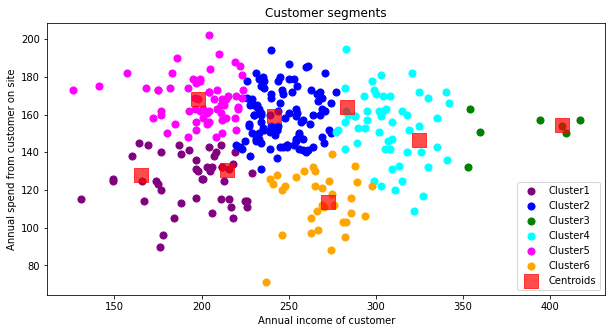

In [212]:
def generate():
    # your code here
    plt.subplots(figsize=(10,5))
    plt.scatter(X[y_means6==0,0],X[y_means6==0,1],s=50, c='purple',label='Cluster1')
    plt.scatter(X[y_means6==1,0],X[y_means6==1,1],s=50, c='blue',label='Cluster2')
    plt.scatter(X[y_means6==2,0],X[y_means6==2,1],s=50, c='green',label='Cluster3')
    plt.scatter(X[y_means6==3,0],X[y_means6==3,1],s=50, c='cyan',label='Cluster4')
    plt.scatter(X[y_means6==4,0],X[y_means6==4,1],s=50, c='magenta',label='Cluster5')
    plt.scatter(X[y_means6==5,0],X[y_means6==5,1],s=50, c='orange',label='Cluster6')
    
    plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
    
    plt.title('Customer segments')
    plt.xlabel('Annual income of customer')
    plt.ylabel('Annual spend from customer on site')
    
    plt.legend()
    plt.show()
    return
generate()

__Interpretation of the 6 segments created__<br/>

Setting the number of clusters to 6 seems to provide a more meaningful customer segmentation.

- <span style="color:purple">**__Cluster 1__:** </span>:: Medium income, low annual spend
- <span style="color:blue">**__Cluster 2__:** </span>:: Low income, low annual spend
- <span style="color:green">**__Cluster 3__:** </span>:: High income, high annual spend
- <span style="color:cyan">**__Cluster 4__:** </span>:: Low income, high annual spend
- <span style="color:magenta">**__Cluster 5__:** </span>:: Medium income, low annual spend
- <span style="color:orange">**__Cluster 6__:** </span>:: Very high income, high annual spend<br/>
Thus it is evident that 6 clusters provides a more meaningful segmentation of the customers.

### Q 9. Use Elbow method to find the optimal number of cluster for our dataset. Use the below parameters for the kmeans model.
- init='k-means++',
- max_iter=300, 
- n_init=10,
- random_state=0
### Plot the graph between " Sum of squared distances of samples to their closest cluster center for number of clusters ranging between 1 to 11" Versus the number of clusters.

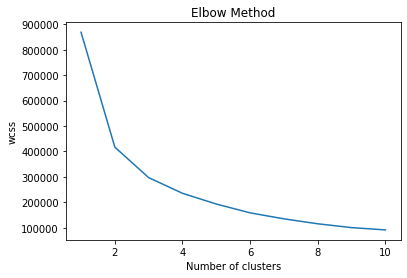

In [223]:
def generate():
    # your code here
    wcss = {}
    for i in range(1,11):
    
        km=KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        km.fit(X)
    
        # wcss[i] = km.inertia_
        wcss[i] = -1*km.score(X)
    
    plt.plot(list(wcss.keys()), list(wcss.values()))

    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('wcss')
    plt.show()
    return
generate()

### Q10. Plot dendrogram to find the optimal number of clusters. Set  "Hierarchical Clustering Dendrogram (truncated) " as title, "sample index or (cluster size)" as  xlabel and "distance" as ylabel. For linkage use the 'ward' method, Also show only the last 12 merged clusters in the dendrogram, keep leaf_font_size as 12. In the plot also draw a line to select a Distance Cut-Off at 400 to Determine the Number of Clusters.
   

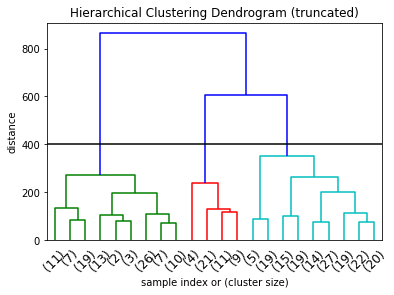

In [226]:
import scipy.cluster.hierarchy as sch
def generate():
    # your code here
    plt.title('Hierarchical Clustering Dendrogram (truncated)')
    plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    Z = sch.linkage(X, 'ward')
    
    
    sch.dendrogram(
                   Z,
                   truncate_mode='lastp',  # show only the last p merged clusters
                   p=22 ,                 # show only the last p merged clusters
                   leaf_font_size=12
                  )
                   
    plt.axhline(y=400, c = 'k')
    plt.show()
    return
generate()

You can see the best choice for the number of cluster is 3.  

### Q 11. Make a hierarical clustering model to cluster the samples in 3 clusters using Agglomerative Clustering object and by taking the below parameters:
- affinity = 'euclidean',
- compute_full_tree = 'auto',
- connectivity = None,
- linkage = 'ward',
- memory = None,
- pooling_func = 'deprecated'

### Return the model.


### Also Compute cluster centers and predict cluster index for each sample using fit_predict method(Return this variable also)

In [0]:
from sklearn.cluster import AgglomerativeClustering
def generate():
    # your code here
    hc = AgglomerativeClustering(  n_clusters = 3,
                                   affinity = 'euclidean',
                                   compute_full_tree = 'auto',
                                   connectivity = None,
                                   linkage = 'ward',
                                   memory = None)
    
    return hc, hc.fit_predict(X)
hc, y_hc = generate()

### Q 12. Visulaize the clusters using scatter plot (Spend Vs Income). Take :
- marker size as 50,
- color for clusters 1 to 3 as red, blue, green respectively,
- label for various clusters as 'Cluster1', 'Cluster2', 'Cluster3'.
- Title of the plot should be ' Clusters of customers '.
- Set "Annual income of customer in `$`000" as label of x axis and
- "Annual spend in`$`000" as label of y axis. 

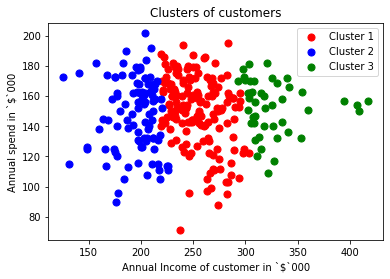

In [229]:
def generate():
    # your code here
    plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
    plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
    plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

    plt.title('Clusters of customers')
    plt.xlabel('Annual Income of customer in `$`000')
    plt.ylabel('Annual spend in `$`000')

    plt.legend()
    plt.show()
    return
generate()

__Interpretation of the 3 segments created__<br/>

The plot shows the distribution of the 3 clusters. We could interpret them as the following customer segments:

- <span style="color:red">**__Cluster 1__:** </span>: Customers with medium annual income and low to high annual spend
- <span style="color:blue">**__Cluster 2__:** </span>: Customers with low annual income and low to high annual spend
- <span style="color:green">**__Cluster 3__:** </span>: Customers with high annual income and medium to high annual spend